In [3]:
import pandas as pd
import numpy as np

In [4]:
data_path = "../data/raw/cmc.data"
features = ["wife_age", "wife_edu", "husband_edu", "num_child", 
            "wife_religion", "wife_work", "husband_job", "standard_of_life", "media_exp", "contraceptive_method"]
df = pd.read_csv(data_path, sep=",", names=features)

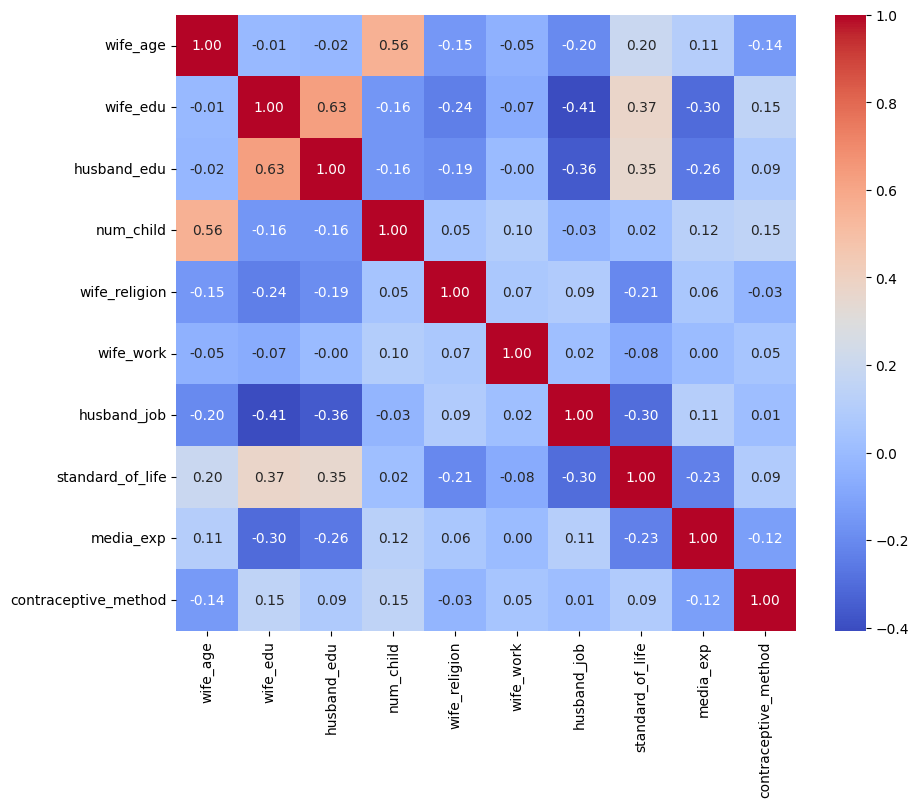

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(method="spearman"), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [6]:
df

,wife_age,wife_edu,husband_edu,num_child,wife_religion,wife_work,husband_job,standard_of_life,media_exp,contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


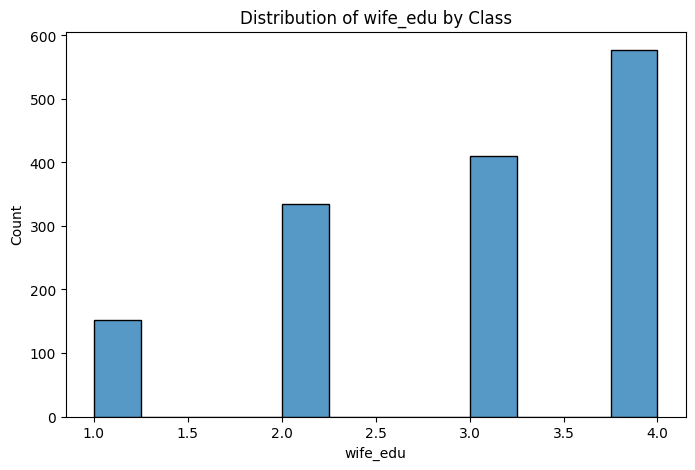

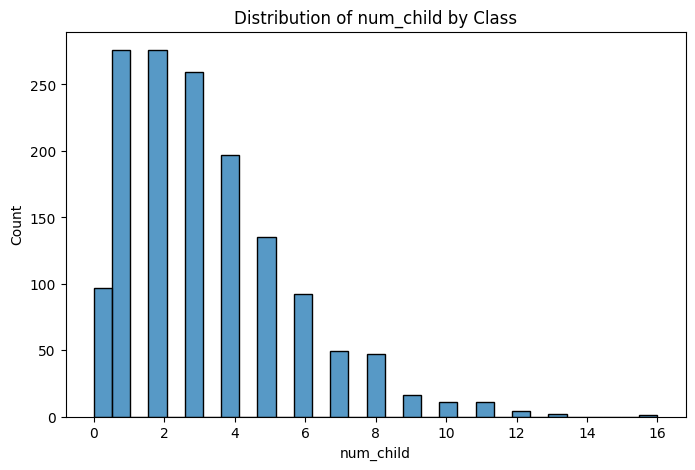

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selected_features = ['wife_edu', 'num_child']

for feature in selected_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

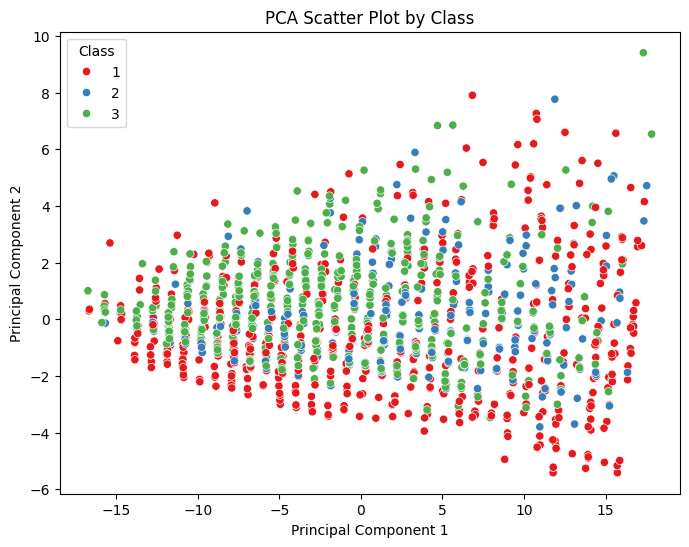

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
y = df["contraceptive_method"]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y, palette='Set1')
plt.title('PCA Scatter Plot by Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.show()

In [5]:
from src.modeling.xgboost import XGBoost
from src.modeling.neural_network import NeuralNetwork
from sklearn.model_selection import train_test_split

/Users/junkim/Desktop/math3856/ml_assignment_2/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
X = df.drop("contraceptive_method", axis=1)
y = df["contraceptive_method"]
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)


In [7]:
model_names = ["xgb", "nn"]
n_splits = 50

metrics = {name: {"train_f1": [], "test_f1": [], "train_auc": [], "test_auc": []} for name in model_names}
y_train_opt = y_train_opt - 1
y_test_opt = y_test_opt - 1

optimized_params = {}
models_for_tuning = {
    "xgb": XGBoost(random_state=0, n_trials=100),
    "nn": NeuralNetwork(random_state=0, n_trials=100)
}

print("==== Optimizing Hyperparameters ====")
for model_name, model in models_for_tuning.items():
    print(f"Tuning {model_name}...")
    model.train_optuna(X_train_opt, y_train_opt)
    optimized_params[model_name] = model.get_best_params()
    print(f"Best params for {model_name}: {optimized_params[model_name]}")

/Users/junkim/Desktop/math3856/ml_assignment_2/.venv/lib/python3.12/site-packages/optuna/_experimental.py:32: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-11-23 12:31:37,422] A new study created in memory with name: no-name-6939eabb-6fc1-453d-bdde-80462825e1a3


==== Optimizing Hyperparameters ====
Tuning xgb...


[I 2025-11-23 12:31:45,728] Trial 0 finished with value: 0.533966822935449 and parameters: {'n_estimators': 86, 'learning_rate': 0.27114608055640466, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.7750709192298254, 'colsample_bytree': 0.824219889454317, 'gamma': 0.2900083790208293, 'reg_lambda': 0.9782672090769302}. Best is trial 0 with value: 0.533966822935449.
[I 2025-11-23 12:31:45,837] Trial 4 finished with value: 0.5254958528669312 and parameters: {'n_estimators': 82, 'learning_rate': 0.27195460038198044, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.8221564462696198, 'colsample_bytree': 0.9778617219732858, 'gamma': 0.039118356915684716, 'reg_lambda': 0.34210828696359674}. Best is trial 0 with value: 0.533966822935449.
[I 2025-11-23 12:31:49,299] Trial 1 finished with value: 0.5297151099891815 and parameters: {'n_estimators': 348, 'learning_rate': 0.2806688742241476, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.9613063516253533, 'colsample_bytree': 0.92852

Best params for xgb: {'n_estimators': 60, 'learning_rate': 0.11928797396469254, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.8766152517173742, 'colsample_bytree': 0.7094874136804272, 'gamma': 0.2696586899785911, 'reg_lambda': 0.7780975668394681}
Tuning nn...


/Users/junkim/Desktop/math3856/ml_assignment_2/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junkim/Desktop/math3856/ml_assignment_2/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junkim/Desktop/math3856/ml_assignment_2/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junkim/Desktop/math3856/ml_assignment_2/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum i

Best params for nn: {}


/Users/junkim/Desktop/math3856/ml_assignment_2/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
from sklearn.model_selection import train_test_split
from src.config import RESULTS_DIR

X = df.drop("contraceptive_method", axis=1)
y = df["contraceptive_method"]

print("\n==== Evaluating Across Splits ====")
for i in range(n_splits):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)
    y_train = y_train - 1
    y_test = y_test - 1

    models = {
        "xgb": XGBoost(random_state=i),
        "nn": NeuralNetwork(random_state=i)
    }

    for model_name, model in models.items():
        model.train_with_params(X_train, y_train, optimized_params[model_name])

        results = model.evaluate(X_train, X_test, y_train, y_test)
        for metric_name in results:
            metrics[model_name][metric_name].append(results[metric_name])

summary = {}

for model_name, model_metrics in metrics.items():
    summary[model_name] = {}
    for metric_name, values in model_metrics.items():
        values = np.array(values)
        summary[model_name][metric_name + "_mean"] = values.mean()
        summary[model_name][metric_name + "_std"] = values.std()

df = pd.DataFrame(summary).T
df.to_excel(f"{RESULTS_DIR}/part_b.xlsx", index=True)
print(f"\nResults saved to Excel file in {RESULTS_DIR}!")


==== Evaluating Across Splits ====


/Users/junkim/Desktop/math3856/ml_assignment_2/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junkim/Desktop/math3856/ml_assignment_2/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junkim/Desktop/math3856/ml_assignment_2/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/junkim/Desktop/math3856/ml_assignment_2/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum i


Results saved to Excel file in /Users/junkim/Desktop/math3856/ml_assignment_2/reports!
